In [36]:
import os
import sys
import numpy as np
from matplotlib import pyplot as plt, ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pysar.simulation.plot import *
from pysar.objects import timeseries, ifgramStack, sensor
from pysar.utils import readfile, writefile, ptime, plot as pp, utils as ut
from pysar import view


work_dir = os.path.expanduser('~/development/python/2018_ComputGeosci_PySAR/pysar_vs_giant')
os.chdir(work_dir)
print('Go to directory: '+work_dir)

#proj_dir = '/Users/yunjunz/insarlab/PYSAR_EXAMPLE/AlcedoSenDT128/'
#yx = [(295, 395)]
#yx.append((189, 348))
#yx.append((300, 515))
#yx_labels = ['A', 'B', 'C']

proj_dir = os.path.expanduser('~/insarlab/Galapagos/GalapagosSenDT128')
proj_name = sensor.project_name2sensor_name(proj_dir)[1]

labels = ['PYSAR', 'G-SBAS', 'G-NSABS', 'G-TimeFun']
ts_files = [os.path.join(proj_dir, i) for i in ['PYSAR/timeseries_ECMWF_demErr_ramp.h5',
                                                'GIANT/Stack/LS-PARAMS.h5',
                                                'GIANT/Stack/NSBAS-PARAMS.h5',
                                                'GIANT/Stack/TS-PARAMS.h5']]
vel_files = [os.path.join(proj_dir, i) for i in ['PYSAR/velocity.h5',
                                                 'GIANT/LS-velocity.h5',
                                                 'GIANT/NSBAS-velocity.h5',
                                                 'GIANT/TS-velocity.h5']]
tcoh_file = os.path.join(proj_dir, 'PYSAR/temporalCoherence.h5')
dem_file = os.path.join(proj_dir, 'PYSAR/INPUTS/geometryRadar.h5')
lut_file = os.path.join(proj_dir, 'PYSAR/INPUTS/geometryRadar.h5')
atr = readfile.read_attribute(ts_files[0])
coord = ut.coordinate(atr, lut_file)

Go to directory: /Users/yunjunz/development/python/2018_ComputGeosci_PySAR/pysar_vs_giant


view.py /Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/PYSAR/velocity.h5 velocity -d /Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/PYSAR/INPUTS/geometryRadar.h5 --dem-nocontour --sub-x 400 1680 --sub-y 750 1200 -u cm --wrap --wrap-range -2 2 --notitle --notick --ref-size 3 --nocbar --fontsize 12 
view.py /Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/GIANT/LS-velocity.h5 velocity -d /Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/PYSAR/INPUTS/geometryRadar.h5 --dem-nocontour --sub-x 400 1680 --sub-y 750 1200 -u cm --wrap --wrap-range -2 2 --notitle --notick --ref-size 3 --nocbar --fontsize 12 
view.py /Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/GIANT/NSBAS-velocity.h5 velocity -d /Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/PYSAR/INPUTS/geometryRadar.h5 --dem-nocontour --sub-x 400 1680 --sub-y 750 1200 -u cm --wrap --wrap-range -2 2 --notitle --notick --ref-size 3 --nocbar --fontsize 12 
view.py /Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/GIAN

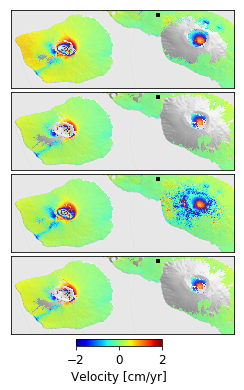

In [7]:
## Linear Velocity Map
x0, x1 = 400, 1680
y0, y1 = 750, 1200
print_msg = False

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(4, 6))
for i in range(len(vel_files)):
    ax = axs.flatten()[i]
    cmd  = 'view.py {} velocity -d {} --dem-nocontour '.format(vel_files[i], dem_file)
    cmd += '--sub-x {} {} --sub-y {} {} '.format(x0, x1, y0, y1)
    cmd += '-u cm --wrap --wrap-range -2 2 '
    cmd += '--notitle --notick --ref-size 3 --nocbar --fontsize 12 '
    print(cmd)
    d_v, atr, inps = view.prep_2d_matrix(cmd, print_msg=print_msg)
    ax, inps, im, cbar = view.plot_2d_matrix(ax, d_v, atr, inps, print_msg=print_msg)
fig.subplots_adjust(hspace=0.02)

# colorbar
cax = fig.add_axes([0.35, 0.1, 0.3, 0.015])
cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
cbar.ax.tick_params(labelsize=font_size)
cbar.locator = ticker.MaxNLocator(nbins=2)
cbar.update_ticks()
cbar.set_label('Velocity [cm/yr]', fontsize=font_size)

# point of interest
#xoff = [-60, -30, 80]
#yoff = [ 60, -80, 30]
#for i in range(len(yx)):
#    y, x = yx[i]
#    ax.flatten()[-1].scatter(x, y, s=8**2, color='w', edgecolors='k')
#    ax.flatten()[-1].annotate(yx_labels[i], (x+xoff[i], y+yoff[i]), fontsize=font_size)

out_file= 'vel_{}.png'.format(proj_name)
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to {}'.format(out_file))
plt.show()

In [ ]:
## Run to get Points of Interest
tsview.py ../../PYSAR/timeseries_ECMWF_demErr_ramp.h5 TS-PARAMS.h5 NSBAS-PARAMS.h5 TS-PARAMS.h5 --ylim -20 40 --label pysar g-sbas g-nsbas g-timefun --wrap --wrap-range -5 5 --zf -l ../../PYSAR/INPUTS/geometryRadar.h5 --yx 825 562

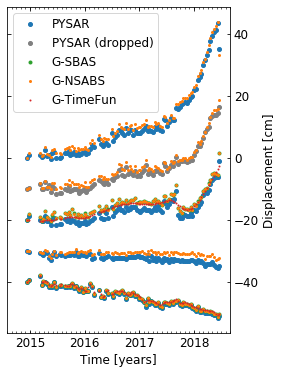

In [43]:
## One pixel with displacement time-series

pts_lalo = [
            [-0.3749, -91.5336],    #Fernandina caldera, largest deformation          --> g-nsbas/pysar give result
            [-0.3706, -91.5418],    #Fernandina caldera, low temp coh                 --> g-nsbas/pysar give result, but pysar dropped due to low tcoh
            [-0.3637, -91.5287],    #Fernandina caldera, low coherent w unw err       --> g-sbas/nsbas overestimated due to unw err, g-timefun filering
            [-0.3750, -91.0781],    #Alcedo lava flow, low coherent w/o unw err       --> g-nsbas underestimated
            [-0.4369, -91.1162],    #Alcedo crater center, high coherent w/o unw err  --> all the same
           ]
#            [-0.4159, -91.4010],    #Fernandina E flank, high coherent w unw err      --> 

#convert lalo to yx
pts_yx = []
for lat, lon in pts_lalo:
    y, x = coord.geo2radar(lat, lon)[0:2]
    pts_yx.append([y, x])

#plot setting
off = -10
unit_scales = [100., 0.1, 0.1, 0.1]
ms_list = np.array([4, 3, 2, 1])
colors = [pp.mplColors[0],
          pp.mplColors[2], 
          pp.mplColors[1], 
          pp.mplColors[3]]

tcoh = readfile.read(tcoh_file)[0]
def plot_one_pixel(ax, box, off=0.):
    for i in [0,1,2,3]:
        dis_ts = readfile.read(ts_files[i], box=box, print_msg=False)[0] * unit_scales[i]
        dis_ts -= dis_ts[0]
        # temp coh and masking
        pts_tcoh = readfile.read(tcoh_file, box=box, print_msg=False)[0]
        if i == 0 and pts_tcoh < 0.7:
            pts_color = 'gray'
            pts_label = 'PYSAR (dropped)'
        else:
            pts_color = colors[i]
            pts_label = labels[i]
        ax.plot(dates, dis_ts+off, 'o', label=pts_label, ms=ms_list[i], c=pts_color)#, mfc='None')
    return ax

atr = readfile.read_attribute(ts_files[0])
date_list = timeseries(ts_files[0]).get_date_list()
dates, datevector = ptime.date_list2vector(date_list)

ycord = [0.75, 0.38, 0.15]
fig, ax = plt.subplots(figsize=(4, 6))
for i in range(len(pts_yx)):
    y, x = pts_yx[i]
    box = [x, y, x+1, y+1]
    ax = plot_one_pixel(ax, box, off=off*i)
    #ax.annotate(yx_labels[i], (0.035, ycord[i]), xycoords='axes fraction', fontsize=font_size)

ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
pp.auto_adjust_xaxis_date(ax, datevector, fontsize=font_size)
ax.tick_params(which='both', direction='in', labelsize=font_size, bottom=True, top=True, left=True, right=True)
#ax.set_ylim(-22, 8)

ax.set_xlabel('Time [years]', fontsize=font_size)
ax.set_ylabel('Displacement [cm]', fontsize=font_size)
handles, labels = ax.get_legend_handles_labels()
pts_handles = [handles[0], handles[4]] + handles[1:4]
pts_labels = [labels[0], labels[4]] + labels[1:4]
plt.legend(pts_handles, pts_labels, loc='best', fontsize=font_size, frameon=True, borderaxespad=0.5)

out_file= 'ts_{}.png'.format(proj_name)
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
plt.show()

In [40]:
labels

['PYSAR',
 'G-SBAS',
 'G-NSABS',
 'G-TimeFun',
 'PYSAR (dropped)',
 'G-SBAS',
 'G-NSABS',
 'G-TimeFun',
 'PYSAR',
 'G-SBAS',
 'G-NSABS',
 'G-TimeFun',
 'PYSAR',
 'G-SBAS',
 'G-NSABS',
 'G-TimeFun',
 'PYSAR',
 'G-SBAS',
 'G-NSABS',
 'G-TimeFun']

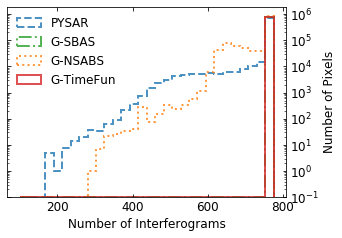

In [158]:
## Histogram of pixels used in network inversion
proj_dir = '/Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/'
#proj_dir = '/Users/yunjunz/insarlab/PYSAR_EXAMPLE/AlcedoSenDT128/'
project_name = sensor.project_name2sensor_name(proj_dir)[1]

mask_file = proj_dir+'PYSAR/maskTempCoh.h5'
mask = readfile.read(mask_file)[0].flatten()
num_inv_ifgram_file = proj_dir+'PYSAR/numInvIfgram.h5'
num_inv_ifgram = readfile.read(num_inv_ifgram_file)[0].flatten()
num_inv_ifgram[mask == 0] = 0
num_inv_ifgram = num_inv_ifgram[num_inv_ifgram != 0.]


num_ifgram_file = proj_dir+'PYSAR/numIfgram.h5'
num_ifg = readfile.read(num_ifgram_file)[0].flatten()
num_ifg = num_ifg[num_ifg != 0.]

num_ifg_max = 775
nthres = 300

# GIANT
num_gsbas = num_ifg[num_ifg == num_ifg_max]
num_gtimefun = num_ifg[num_ifg == num_ifg_max]
num_gnsbas = num_ifg[num_ifg >= nthres]
num_pysar = num_inv_ifgram

num_data = (num_pysar, num_gsbas, num_gnsbas, num_gtimefun)
labels = ['PYSAR', 'G-SBAS', 'G-NSABS', 'G-TimeFun']
linestyles = ('dashed', 'dashdot', 'dotted', 'solid')

fig, ax = plt.subplots(figsize=(5, 3.5))
for i in [0, 1, 2, 3]:
    ax.hist(num_data[i], bins=30, histtype='step', 
            range=(100,num_ifg_max), log=True,
            color=colors[i],
            label=labels[i], alpha=0.8, lw=2, linestyle=linestyles[i])
#ax.set_ylim((1e-1, 5e6))
ax.yaxis.tick_right()
ax.tick_params(which='both', direction='in', labelsize=font_size, bottom=True, top=True, left=True, right=True)
ax.yaxis.set_label_position("right")
plt.xlabel('Number of Interferograms', fontsize=font_size)
plt.ylabel('Number of Pixels', fontsize=font_size)
plt.legend(loc='upper left', fontsize=font_size, frameon=False, borderaxespad=0.4) #, bbox_to_anchor=(0.01, 0.9))


out_file = 'hist_num_ifgram_{}.jpg'.format(project_name)
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
plt.show()

In [68]:
## Calculate number of pixels used in inversion in pysar and giant
proj_dir = '/Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/'
proj_dir = '/Users/yunjunz/insarlab/PYSAR_EXAMPLE/AlcedoSenDT128/'
cthres = 0.25

water_mask_file = proj_dir+'PYSAR/waterMask.h5'
water_mask = readfile.read(water_mask_file)[0]

ifgram_file = proj_dir+'PYSAR/INPUTS/ifgramStack.h5'
stack_obj = ifgramStack(ifgram_file)
stack_obj.open()

num_ifgram = np.zeros((stack_obj.length, stack_obj.width), np.int16)

for i in range(stack_obj.numIfgram):
    date12 = stack_obj.date12List[i]
    unw = stack_obj.read(datasetName='unwrapPhase-{}'.format(date12), print_msg=False)
    cor = stack_obj.read(datasetName='coherence-{}'.format(date12), print_msg=False)
    unw[water_mask == 0] = 0
    unw[cor < 0.25] = 0.
    num_map = unw != 0
    num_ifgram += num_map
    sys.stdout.write('\rifgram {}/{}'.format(i+1, stack_obj.numIfgram))
    sys.stdout.flush()
print('')
num_inv_ifgram_file = proj_dir+'/PYSAR/numInvIfgram.h5'
out_file = proj_dir+'/PYSAR/numIfgram.h5'
writefile.write(num_ifgram, out_file=out_file, ref_file=num_inv_ifgram_file)

open ifgramStack file: ifgramStack.h5
ifgram 775/775
create HDF5 file: /Users/yunjunz/insarlab/PYSAR_EXAMPLE/AlcedoSenDT128//PYSAR/numIfgram.h5 with w mode
create dataset /mask of int16      in size of (646, 729) with compression=None
finished writing to /Users/yunjunz/insarlab/PYSAR_EXAMPLE/AlcedoSenDT128//PYSAR/numIfgram.h5


In [30]:

os.getcwd()



'/Users/yunjunz/development/python/2018_ComputGeosci_PySAR/pysar_vs_giant'